# Fast Fourier Transform (FFT) Example for Time Series Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Seed
* Set a seed for reproducibility

In [2]:
np.random.seed(1234)

# Define sampling rate and time vector
* Sapmling Rate (Frequency): samples per second
* 1000 samples per second, and t is a time vector spanning 1 second with 1000 points

In [3]:
# Aslo known as: sampling frequency
sampling_rate = 1000 # in hertz (Hz)
t = np.linspace(0, 1, sampling_rate)

# Generate Data with Frequencies and Amplitudes
* Sine wave: $y = sin(2\pi ft)$
* Two sine waves with frequencies freq1 (5 Hz) and freq2 (50 Hz) are defined, each with different amplitudes (amplitude1 and amplitude2)

In [4]:
freq1 = 5  
freq2 = 50  

amplitude1 = 1 
amplitude2 = 0.5

data = amplitude1 * np.sin(2*np.pi*freq1*t) + amplitude2 * np.sin(2*np.pi*freq2*t)

# Compute the FFT (Fast Fourier Transform) of the signal
* FFT is a mathematical algorithm that transforms a signal from its original time domain representation (data) into the frequency domain
* The output **fft_result** will be a complex array where each element represents the amplitude and phase of a specific frequency component of the input signal data
* **np.fft.fftfreq()** This function generates an array of frequency bins
* **1/sampling_rate** Specifies the spacing between the frequency bins, where sampling_rate is the rate at which samples were taken from the original signal (data). This determines the resolution of the frequency axis

In [5]:
fft_result = np.fft.fft(data)
fft_freqs = np.fft.fftfreq(len(data), 1/sampling_rate)

# Plotting Time Series Data and Frequency Domain Representation
* **[:len(fft_freqs)//2]** slices the array to include only the first half of the frequencies. This is because the FFT result is symmetric, and the second half is a mirror image of the first half (due to the nature of real-valued FFT)
* **np.abs(fft_result)** computes the absolute values of each complex FFT coefficient, giving us the magnitude of each frequency component
* **[:len(fft_result)//2]** similarly slices the array to include only the first half of the FFT result, corresponding to positive frequencies
* The absolute value **np.abs()** operation is used because the FFT result provides amplitude information in the form of complex numbers (real + imaginary parts)

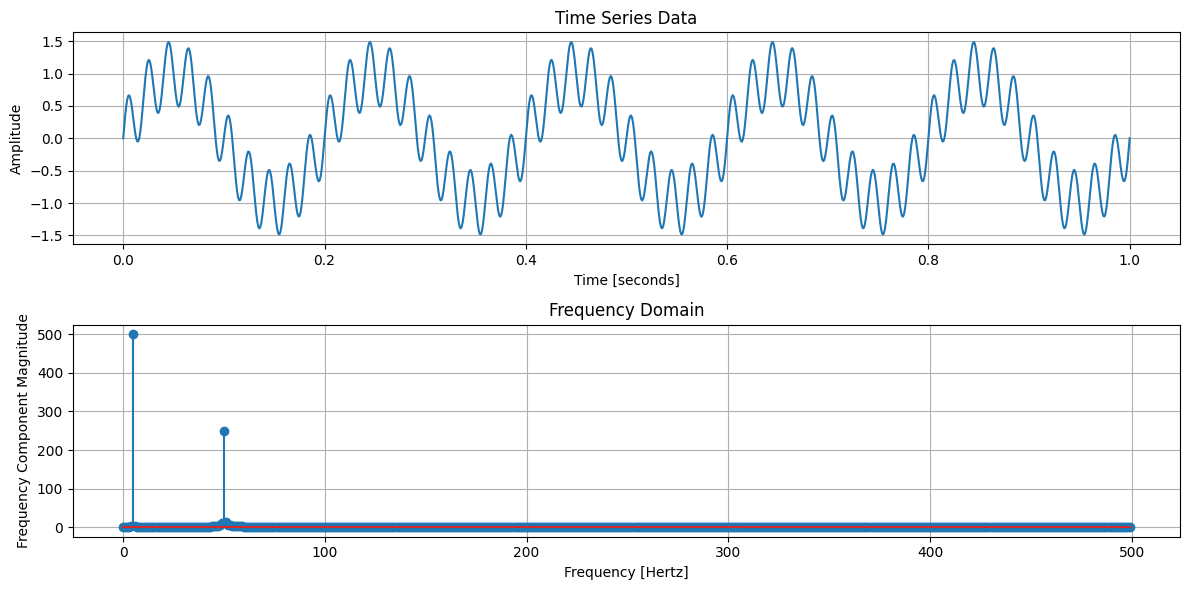

In [6]:
plt.figure(figsize=(12, 6))

# Plot the time series data
plt.subplot(2, 1, 1)
plt.plot(t, data)
plt.grid('on')
plt.title('Time Series Data')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')

# Plot the frequency domain representation
plt.subplot(2, 1, 2)
plt.stem(fft_freqs[:len(fft_freqs)//2], np.abs(fft_result)[:len(fft_result)//2])
plt.title('Frequency Domain')
plt.grid('on')
plt.xlabel('Frequency [Hertz]')
plt.ylabel('Frequency Component Magnitude')

plt.tight_layout()
plt.show()